## Deep Learning  CNN

In [28]:
# importing function 
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [2]:
df = pd.read_csv("data_with_features.csv")
# training data without labels
labels = np.array(df['Label'])
df = df.drop(['Label','Return-Path','Message-ID','From','Reply-To','To','Subject','Date','X-Mailer','MIME-Version','Content-Type','X-Priority','X-MSMail-Priority','Status','Content-Length','Content-Transfer-Encoding','Lines'], axis = 1)
df

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Submitting Host,hops,special_characters_exists_subject,number_of_words_subject,number_of_capitalized_words_subject,number_of_capitalized_characters_subject,number_of_digits_subject,number_of_characters_subject,number_of_spaces_subject,number_of_special_characters_subject,number_of_single_Quotes_subject,number_of_semiColon_subject,ratio_of_uppercase/lowercase_words,Total_number_of_upperCase,Max_word_length_in_subject
0,riffle,3,0,4,0,0,0,19,4,0,0.0,0,0.000000,0,9
1,dp.samba.org (localhost [127.0.0.1]),2,0,3,0,0,0,9,2,0,0.0,0,0.000000,0,6
2,130.216.104.237 ([130.216.104.237]) by,9,1,6,3,7,0,15,6,4,0.0,0,1.000000,3,8
3,plumcopper.com (plumcopper.com [208.66.235.190]),1,0,3,0,2,0,12,2,0,0.0,0,0.000000,0,7
4,shane by continuum.cm.nu with local (Exim 4.63),6,0,2,0,1,0,2,1,0,0.0,0,0.000000,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62389,au.padl.com (localhost.padl.com [127.0.0.1]),4,0,2,0,1,0,2,1,0,0.0,0,0.000000,0,2
62390,cbsig.com (web145.bc.cbsig.net [65.244.48.145]),1,1,4,0,1,7,7,3,1,0.0,0,0.000000,0,6
62391,controldraw.net (r01h05.chitay-zdes.ru [89.208...,1,0,4,1,7,0,26,4,0,0.0,0,0.333333,1,11
62392,quark.foo.net (c-69-142-196-170.hsd1.nj.comcas...,4,0,2,0,1,0,2,1,0,0.0,0,0.000000,0,2


## Deep Learning RNN

In [48]:
rnn_df = pd.read_csv("data_with_features.csv", dtype='unicode')
rnn_df = rnn_df.drop(['Return-Path','Message-ID','From','Reply-To','To','Submitting Host','Subject','Date','X-Mailer','MIME-Version','Content-Type','X-Priority','X-MSMail-Priority','Status','Content-Length','Content-Transfer-Encoding','Lines'], axis = 1)
rnn_df

,Label,hops,special_characters_exists_subject,number_of_words_subject,number_of_capitalized_words_subject,number_of_capitalized_characters_subject,number_of_digits_subject,number_of_characters_subject,number_of_spaces_subject,number_of_special_characters_subject,number_of_single_Quotes_subject,number_of_semiColon_subject,ratio_of_uppercase/lowercase_words,Total_number_of_upperCase,Max_word_length_in_subject
0,1,3,0,4,0,0,0,19,4,0,0.0,0,0.0,0,9
1,0,2,0,3,0,0,0,9,2,0,0.0,0,0.0,0,6
2,0,9,1,6,3,7,0,15,6,4,0.0,0,1.0,3,8
3,1,1,0,3,0,2,0,12,2,0,0.0,0,0.0,0,7
4,0,6,0,2,0,1,0,2,1,0,0.0,0,0.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62389,0,4,0,2,0,1,0,2,1,0,0.0,0,0.0,0,2
62390,0,1,1,4,0,1,7,7,3,1,0.0,0,0.0,0,6
62391,1,1,0,4,1,7,0,26,4,0,0.0,0,0.3333333333333333,1,11
62392,0,4,0,2,0,1,0,2,1,0,0.0,0,0.0,0,2


#### Split data for testing and training.

In [49]:
test_size = int(len(rnn_df) * 0.5)
train_data = rnn_df.iloc[:-test_size,:].copy()
test_data = rnn_df.iloc[-test_size:,:].copy()

#### Split training data into labels and features

In [50]:
features_train = train_rnn.drop('Label',axis=1).copy()
label_train = train_rnn[['Label']].copy()

#### Convert pandas dataframes to numpy arrays

In [51]:
feature_scaler = MinMaxScaler(feature_range=(0, 1))
feature_scaler.fit(features_train)
scaled_feature_train = feature_scaler.transform(features_train)

label_scaler = MinMaxScaler(feature_range=(0, 1))
label_scaler.fit(label_train)
scaled_label_train = label_scaler.transform(label_train)

scaled_label_train = scaled_label_train.reshape(-1)


scaled_label_train = np.insert(scaled_label_train, 0, 0)
scaled_label_train = np.delete(scaled_label_train, -1)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


#### Merge feature training and label training numpy arrays

In [52]:
n_input = 25 
n_features= features_train.shape[1]
b_size = 32
generator = TimeseriesGenerator(scaled_feature_train, scaled_label_train, length=n_input, batch_size=b_size)

print(generator[0][0].shape)

(32, 25, 14)


#### Instantiate the sequential model

In [53]:
model = Sequential()

model.add(LSTM(128, input_shape=(n_input, n_features), activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='softmax'))

model.compile(loss='mse', optimizer ='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 25, 128)           73216     
_________________________________________________________________
dropout_19 (Dropout)         (None, 25, 128)           0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                4128      
_________________________________________________________________
dropout_21 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

#### Train RNN model

In [54]:
model.fit_generator(generator,epochs=11)

Epoch 1/11
975/975 [==============================] - 90s 92ms/step - loss: 0.3589 - acc: 0.6412
Epoch 2/11
975/975 [==============================] - 98s 101ms/step - loss: 0.3589 - acc: 0.6412
Epoch 3/11
975/975 [==============================] - 97s 99ms/step - loss: 0.3589 - acc: 0.6412
Epoch 4/11
975/975 [==============================] - 97s 99ms/step - loss: 0.3589 - acc: 0.6412
Epoch 5/11
975/975 [==============================] - 90s 93ms/step - loss: 0.3589 - acc: 0.6412
Epoch 6/11
975/975 [==============================] - 87s 89ms/step - loss: 0.3589 - acc: 0.6412
Epoch 7/11
975/975 [==============================] - 97s 100ms/step - loss: 0.3589 - acc: 0.6412
Epoch 8/11
975/975 [==============================] - 82s 84ms/step - loss: 0.3589 - acc: 0.6412
Epoch 9/11
975/975 [==============================] - 80s 82ms/step - loss: 0.3589 - acc: 0.6412
Epoch 10/11
975/975 [==============================] - 81s 83ms/step - loss: 0.3589 - acc: 0.6412
Epoch 11/11
975/975 [======

#### Plot losses per epoch

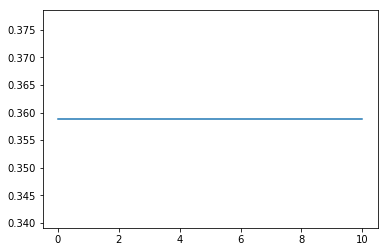

In [55]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch);